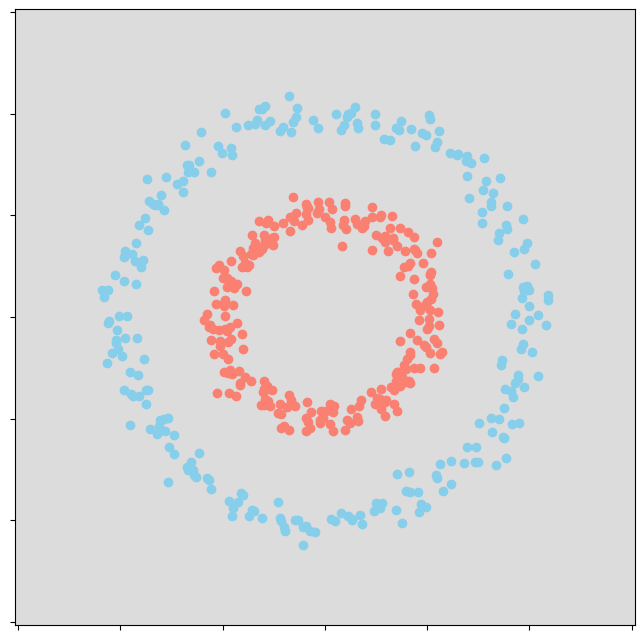

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

# Creamos nuestros datos artificiales, donde buscaremos clasificar dos anillos concéntricos de datos.
X, Y = make_circles(n_samples=500, factor=0.5, noise=0.05)

# Resolución del mapa de predicción.
res = 100

# Coordenadas del mapa de predicción.
_x0 = np.linspace(-1.5, 1.5, res)
_x1 = np.linspace(-1.5, 1.5, res)

# Input con cada combinación de coordenadas del mapa de predicción.
_pX = np.array(np.meshgrid(_x0, _x1)).T.reshape(-1, 2)

# Objeto vacío de 0.5 del mapa de predicción.
_pY = np.zeros((res, res)) + 0.5

# Visualización del mapa de predicción
plt.figure(figsize=(8, 8))
plt.pcolormesh(_x0, _x1, _pY, cmap="coolwarm", vmin=0, vmax=1, shading='auto')

# Visualización de la nube de datos.
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], c="skyblue")
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], c="salmon")

plt.tick_params(labelbottom=False, labelleft=False)
plt.show()

Step 0 / 1000 - Loss = 0.44632918 - Acc = 0.512
Step 25 / 1000 - Loss = 0.2934272 - Acc = 0.618
Step 50 / 1000 - Loss = 0.19001381 - Acc = 0.842
Step 75 / 1000 - Loss = 0.124806605 - Acc = 0.87
Step 100 / 1000 - Loss = 0.079445615 - Acc = 0.95
Step 125 / 1000 - Loss = 0.060357887 - Acc = 0.982
Step 150 / 1000 - Loss = 0.0490103 - Acc = 0.99
Step 175 / 1000 - Loss = 0.04130272 - Acc = 0.996
Step 200 / 1000 - Loss = 0.035579853 - Acc = 0.998
Step 225 / 1000 - Loss = 0.03118052 - Acc = 1.0
Step 250 / 1000 - Loss = 0.02766386 - Acc = 1.0
Step 275 / 1000 - Loss = 0.024726983 - Acc = 1.0
Step 300 / 1000 - Loss = 0.022295125 - Acc = 1.0
Step 325 / 1000 - Loss = 0.020269813 - Acc = 1.0
Step 350 / 1000 - Loss = 0.018535446 - Acc = 1.0
Step 375 / 1000 - Loss = 0.017051943 - Acc = 1.0
Step 400 / 1000 - Loss = 0.015790451 - Acc = 1.0
Step 425 / 1000 - Loss = 0.014702886 - Acc = 1.0
Step 450 / 1000 - Loss = 0.013755089 - Acc = 1.0
Step 475 / 1000 - Loss = 0.012918421 - Acc = 1.0
Step 500 / 1000 - L

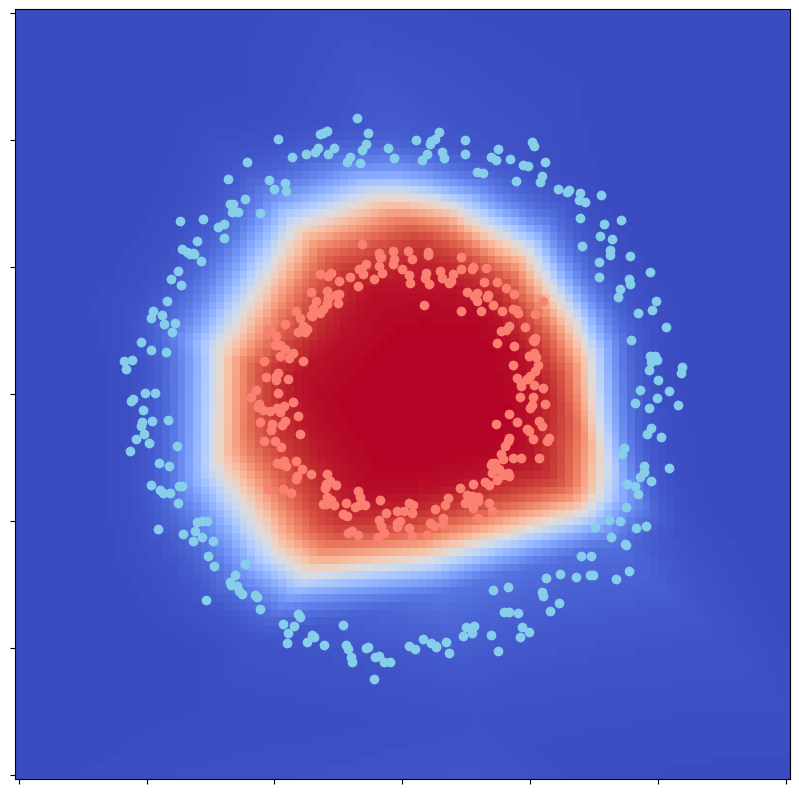

In [ ]:
#Impot Tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

from matplotlib import animation
from IPython.core.display import display, HTML

#Definimos los puntos de entrada de la red, para la matrix X e Y
iX = tf.placeholder("float", shape=[None, X.shape[1]])
iY = tf.placeholder("float", shape=[None])

lr = 0.01  # learning rate
nn =[2,16,8,1]  # número de neuronas en cada capa

#Capa 1
W1 = tf.Variable(tf.random_normal([nn[0], nn[1]]), name="weights_1")
b1 = tf.Variable(tf.random_normal([nn[1]]), name="bias_1")
l1 = tf.nn.relu(tf.add(tf.matmul(iX, W1), b1))

#Capa 2
W2 = tf.Variable(tf.random_normal([nn[1], nn[2]]), name="weights_2")
b2 = tf.Variable(tf.random_normal([nn[2]]), name="bias_2")
l2 = tf.nn.relu(tf.add(tf.matmul(l1, W2), b2))

#Capa 3
W3 = tf.Variable(tf.random_normal([nn[2], nn[3]]), name="weights_3")
b3 = tf.Variable(tf.random_normal([nn[3]]), name="bias_3")

#Vector de predicciones de Y.
pY = tf.nn.sigmoid(tf.add(tf.matmul(l2, W3), b3))[:,0]

#Evaluacion de las predicciones
loss = tf.losses.mean_squared_error(pY, iY)

#Definimos al optimizador de la red, para que minimice el error.
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(loss)
n_steps = 1000 # Numero de ciclos de entrenamiento.
iPY = [] # aqui guardamos la evolucion de las prediccion, para la animacion.

with tf.Session() as sess:
#Inicializamos todos  los parametros de la red, las matrices W y b.
  sess.run(tf.global_variables_initializer())
  #Iteramos n pases de entrenamiento.
  for step in range(n_steps):
    #Evaluamos al optimizador, a la funciòn de coste y al tensor de salida pY.
    # la evaluaciòn del optimizer producira el entrenamiento  de la red.
    _,_loss, _pY = sess.run([optimizer, loss, pY], feed_dict={iX: X, iY: Y})
    # Cada 25 iteraciones, imprimimos metricas.
    if step % 25 == 0:
     # Calculo del accuracy.
     acc = np.mean(np.round(_pY) == Y)
     #impresion de metricas.
     print("Step", step, "/", n_steps, "- Loss =", _loss, "- Acc =", acc)
     #Obtenemos predicciones para cada punto de nuestro mapa de `resiccion _pX.
     _pY = sess.run(pY, feed_dict={iX: _pX}).reshape(res, res)
     #Y lo guardamos para visualizar la animacion
     iPY.append(_pY)

#------------CODIGO ANIMACION-----------#
ims = []
fig = plt.figure(figsize=(10, 10))
print("Creating animation...")

for fr in range(len(iPY)):
  im = plt.pcolormesh(_x0, _x1, iPY[fr], cmap="coolwarm", animated=True)
  #Visulizacion de la nube de datos.
  plt.scatter(X[Y == 0, 0], X[Y == 0, 1], c="skyblue")
  plt.scatter(X[Y == 1, 0], X[Y == 1, 1], c="salmon")
  #plt.title("esultado Clasificacion")
  plt.tick_params(labelbottom=False, labelleft=False)
  ims.append([im])
ani=animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
HTML(ani.to_html5_video())



